## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [2]:
# I added this function to load data

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import tf_export


@tf_export('keras.datasets.mnist.load_data')
def load_data(path='mnist.npz'):
  """Loads the MNIST dataset.
  Arguments:
      path: path where to cache the dataset locally
          (relative to ~/.keras/datasets).
  Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
  License:
      Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
      which is a derivative work from original NIST datasets.
      MNIST dataset is made available under the terms of the
      [Creative Commons Attribution-Share Alike 3.0 license.](
      https://creativecommons.org/licenses/by-sa/3.0/)
  """
#   origin_folder = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'
#   path = get_file(
#       path,
#       origin=origin_folder + 'mnist.npz',
#       file_hash='8a61469f7ea1b51cbae51d4f78837e45')

  path = '/mnt/external_data/mnist/mnist.npz'

  with np.load(path) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

    return (x_train, y_train), (x_test, y_test)

In [19]:
# YOUR CODE SHOULD START HERE
class my_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') >= .99):
            print('\nReached 99% accuracy so cancelling training!')
            self.model.stop_training = True
            
instance_of_my_callback = my_callback()
            
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# (x_train, y_train),(x_test, y_test) = mnist.load_data()
(x_train, y_train),(x_test, y_test) = load_data()

# YOUR CODE SHOULD START HERE
x_train = x_train / 255.0
x_test = x_test / 255.0

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 500, activation= tf.keras.activations.relu),
                                    tf.keras.layers.Dense(units = 10, activation= tf.keras.activations.softmax)
                                    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs = 10, callbacks= [instance_of_my_callback])
# YOUR CODE SHOULD END HERE

Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.2013 - acc: 0.9410
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0805 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0523 - acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0371 - acc: 0.9882
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0253 - acc: 0.9921
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 8s 128us/step - loss: 0.0252 - acc: 0.9921


In [46]:
# YOUR CODE SHOULD START HERE
class my_callback_validation(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('val_loss') < .1):
            print('\nReached < 0.1 validation loss so cancelling training!')
            self.model.stop_training = True
            
instance_of_my_callback_validation = my_callback_validation()
            
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# (x_train, y_train),(x_test, y_test) = mnist.load_data()
(x_train, y_train),(x_test, y_test) = load_data()

# YOUR CODE SHOULD START HERE
x_train = x_train / 255.0
x_test = x_test / 255.0

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 500, activation= tf.keras.activations.relu),
                                    tf.keras.layers.Dense(units = 10, activation= tf.keras.activations.softmax)
                                    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs = 10, validation_split = 0.2, callbacks= [instance_of_my_callback_validation])
# YOUR CODE SHOULD END HERE

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 167us/step - loss: 0.2227 - acc: 0.9342 - val_loss: 0.1201 - val_acc: 0.9652
Epoch 2/10
47648/48000 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9732
Reached < 0.1 validation loss so cancelling training!
48000/48000 [==============================] - 7s 143us/step - loss: 0.0895 - acc: 0.9733 - val_loss: 0.0949 - val_acc: 0.9703


In [20]:
import matplotlib.pyplot as plt

(28, 28)


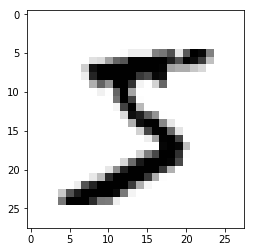

In [21]:
print(x_train[0].shape)
plt.imshow(x_train[0], cmap= 'gray_r')

In [24]:
test_preds = model.predict(x_test)

In [25]:
train_preds = model.predict(x_train)

In [37]:
test_index = 1

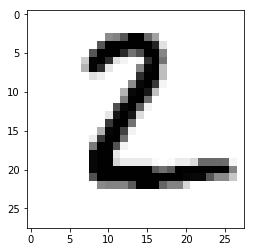

In [38]:
plt.imshow(x_test[test_index], cmap= 'gray_r')

In [39]:
np.argmax(test_preds[test_index])

2

In [40]:
y_test[test_index]

2